In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
dt=pd.read_csv('Iris.csv')

In [3]:
#check the first five values
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#statastical analysis
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#check the data types
dt.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
dt['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

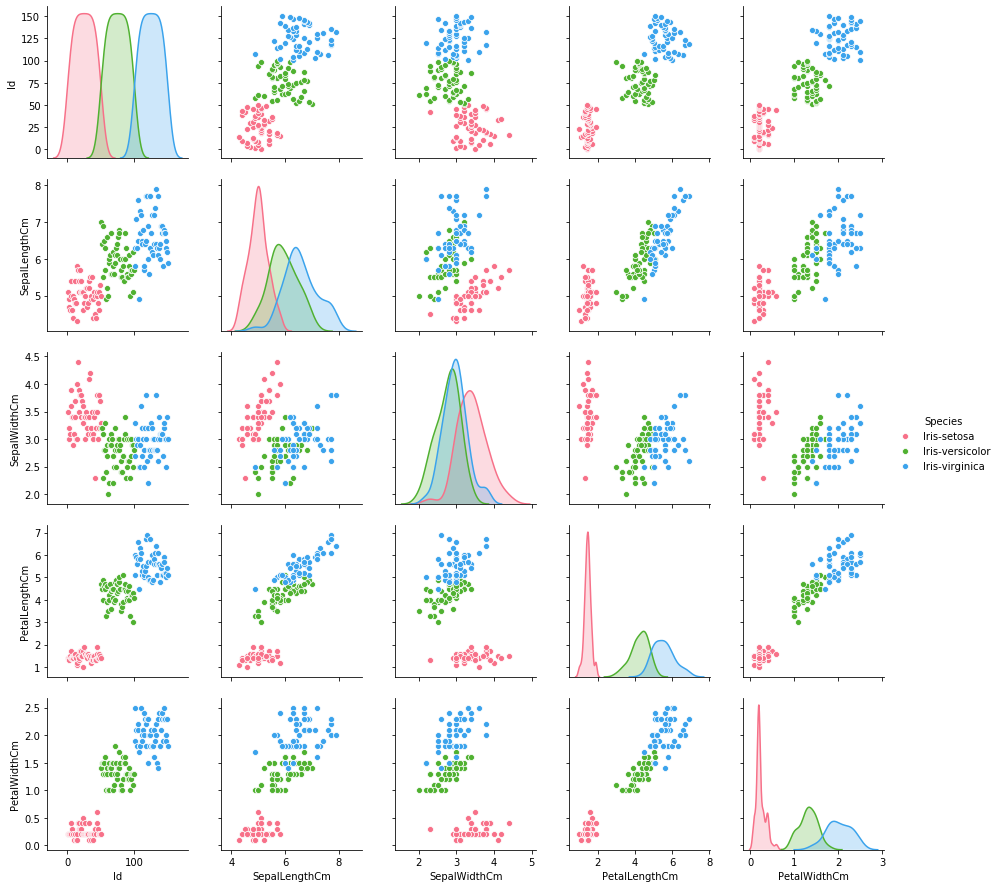

In [7]:
sns.pairplot(dt,hue='Species',palette='husl')

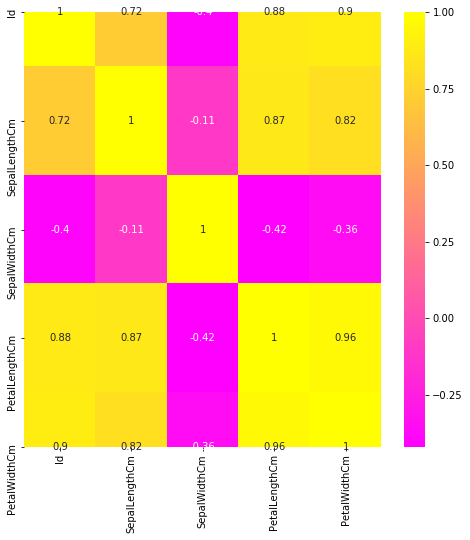

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(dt.corr(),annot=True,cmap='spring')

In [9]:
#separting independent and dependent variable to x and y
x=dt.iloc[:,1:5]
y=dt['Species']

In [10]:
#splitting x and y data to test and train
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [11]:
xtrain.shape

(105, 4)

In [12]:
ytrain.shape

(105,)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,105,2):
    regressor=KNeighborsClassifier(n_neighbors=i)
    regressor.fit(xtrain,ytrain)
    y_pred = regressor.predict(xtest)
    print("Accuracy:",accuracy_score(ytest, y_pred), "for ",i)

Accuracy: 0.9333333333333333 for  1
Accuracy: 0.9555555555555556 for  3
Accuracy: 0.9333333333333333 for  5
Accuracy: 0.9333333333333333 for  7
Accuracy: 0.9333333333333333 for  9
Accuracy: 0.9555555555555556 for  11
Accuracy: 0.9333333333333333 for  13
Accuracy: 0.9333333333333333 for  15
Accuracy: 0.9333333333333333 for  17
Accuracy: 0.9111111111111111 for  19
Accuracy: 0.9111111111111111 for  21
Accuracy: 0.9111111111111111 for  23
Accuracy: 0.9111111111111111 for  25
Accuracy: 0.8888888888888888 for  27
Accuracy: 0.8666666666666667 for  29
Accuracy: 0.8444444444444444 for  31
Accuracy: 0.8444444444444444 for  33
Accuracy: 0.8222222222222222 for  35
Accuracy: 0.8222222222222222 for  37
Accuracy: 0.8222222222222222 for  39
Accuracy: 0.8222222222222222 for  41
Accuracy: 0.8222222222222222 for  43
Accuracy: 0.8222222222222222 for  45
Accuracy: 0.8222222222222222 for  47
Accuracy: 0.8222222222222222 for  49
Accuracy: 0.8444444444444444 for  51
Accuracy: 0.8444444444444444 for  53
Accura

In [21]:
from sklearn.neighbors import KNeighborsClassifier
regressor=KNeighborsClassifier(n_neighbors=11)
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(ytest, ypred))

Accuracy: 0.9555555555555556


In [23]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[15  0  0]
 [ 0 13  0]
 [ 0  2 15]]


In [24]:
#Create a classification report for the model
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.88      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

